In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, StandardScaler, PowerTransformer 

In [2]:
listings_detailed = pd.read_csv('listings_detailed.csv', parse_dates=True, 
                                true_values=['t'], false_values=['f'], na_values=[None, 'none'])
listings_detailed.head(5)

C:\Users\shala\Anaconda3\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (43,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6369,https://www.airbnb.com/rooms/6369,20190919050215,2019-09-19,"Rooftop terrace room with ensuite bathroom, Airc.","Atico en la calle Principe de Vergara, con bañ...",BETTER THAN A HOTEL.Upscale neighboorhood (Met...,BETTER THAN A HOTEL.Upscale neighboorhood (Met...,NaN,Nice and definitely non touristic neighborhoo...,...,False,False,flexible,False,False,1,0,1,0,0.56
1,21853,https://www.airbnb.com/rooms/21853,20190919050215,2019-09-19,Bright and airy room,We have a quiet and sunny room with a good vie...,I am living in a nice flat near the centre of ...,We have a quiet and sunny room with a good vie...,NaN,We live in a leafy neighbourhood with plenty o...,...,False,False,strict_14_with_grace_period,False,False,2,0,2,0,0.55
2,24805,https://www.airbnb.com/rooms/24805,20190919050215,2019-09-19,Gran Via Studio Madrid,"Studio located 50 meters from Gran Via, next t...",LOCATION. Brand new flats near the Atlantic H...,"Studio located 50 meters from Gran Via, next t...",NaN,"The area is next to the Gran Via, so people li...",...,False,False,moderate,False,False,1,1,0,0,0.03
3,24836,https://www.airbnb.com/rooms/24836,20190919050215,2019-09-19,"Select the Madrid more ""cool"".",Apartamento céntrico junto a Gran Vía (VT-296)...,"Select the Madrid more ""cool"" : 70 m, 2 bedroo...","Select the Madrid more ""cool"" : 70 m, 2 bedroo...",NaN,"Cosmopolita, lleno de locales de moda, restaur...",...,False,False,moderate,False,False,1,1,0,0,0.63
4,26825,https://www.airbnb.com/rooms/26825,20190919050215,2019-09-19,Single Room whith private Bathroom,Nice and cozy roon for one person with a priva...,Nice and cozy roon for one person with a priva...,Nice and cozy roon for one person with a priva...,NaN,"Es un barrio muy tranquilo, en una zona de Mad...",...,False,False,strict_14_with_grace_period,False,False,1,0,1,0,1.19


In [3]:
listings_detailed['extra_people']=listings_detailed.price.apply(lambda x: x.strip('$'))
listings_detailed_1=listings_detailed.extra_people.apply(lambda x: x.replace(',',''))
listings_detailed['extra_people']=listings_detailed_1.astype('float64')

In [4]:
listings_detailed['price']=listings_detailed.price.apply(lambda x: x.strip('$'))
listings_detailed_1=listings_detailed.price.apply(lambda x: x.replace(',',''))
listings_detailed['price']=listings_detailed_1.astype('float64')

In [5]:
listings_detailed_2=listings_detailed.host_response_rate.astype(str)
listings_detailed_2=listings_detailed_2.apply(lambda x: x.replace('%',''))
listings_detailed['host_response_rate']=listings_detailed_2.astype('float64')

In [6]:
# data0=listings_detailed.fillna(0)
data1=listings_detailed.copy()
data1.security_deposit.fillna('$0.00', inplace=True)
data1=data1.security_deposit.apply(lambda x: x.replace('$',''))
data1=data1.apply(lambda x: x.replace(',',''))
listings_detailed['security_deposit']=data1.astype('float64')
listings_detailed['security_deposit'].head()

0      0.0
1      0.0
2    200.0
3    200.0
4      0.0
Name: security_deposit, dtype: float64

In [7]:
data = listings_detailed[listings_detailed['price']<300][['host_is_superhost', 'zipcode','latitude','longitude', 'property_type','room_type','bathrooms','bedrooms','price','security_deposit','extra_people','has_availability','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable', 'neighbourhood_group_cleansed']]
data['room_type_no']=data['price']*0
data=data.fillna(0)
data.head()

,host_is_superhost,zipcode,latitude,longitude,property_type,room_type,bathrooms,bedrooms,price,security_deposit,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,neighbourhood_group_cleansed,room_type_no
0,False,28016,40.45628,-3.67763,Apartment,Private room,1.0,1.0,70.0,0.0,...,98.0,10.0,10.0,9.0,10.0,9.0,10.0,False,Chamartín,0.0
1,False,28047,40.40341,-3.74084,Apartment,Private room,1.0,1.0,17.0,0.0,...,92.0,9.0,9.0,10.0,10.0,8.0,9.0,False,Latina,0.0
2,False,28004,40.42202,-3.70395,Apartment,Entire home/apt,1.0,0.0,80.0,200.0,...,100.0,8.0,8.0,10.0,10.0,10.0,10.0,False,Centro,0.0
3,True,28004,40.41995,-3.69764,Apartment,Entire home/apt,1.5,2.0,115.0,200.0,...,98.0,10.0,10.0,10.0,10.0,10.0,10.0,False,Centro,0.0
4,False,28045,40.38985,-3.69011,House,Private room,1.0,1.0,25.0,0.0,...,94.0,10.0,10.0,10.0,10.0,10.0,10.0,False,Arganzuela,0.0


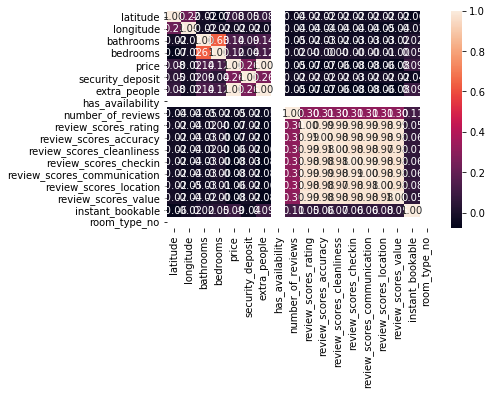

In [8]:
sns.heatmap(data.corr(), annot=True, fmt=".2f")

In [9]:
data = data*1
data['host_is_superhost'].head(5)

0    0
1    0
2    0
3    1
4    0
Name: host_is_superhost, dtype: object

(-50, 800)

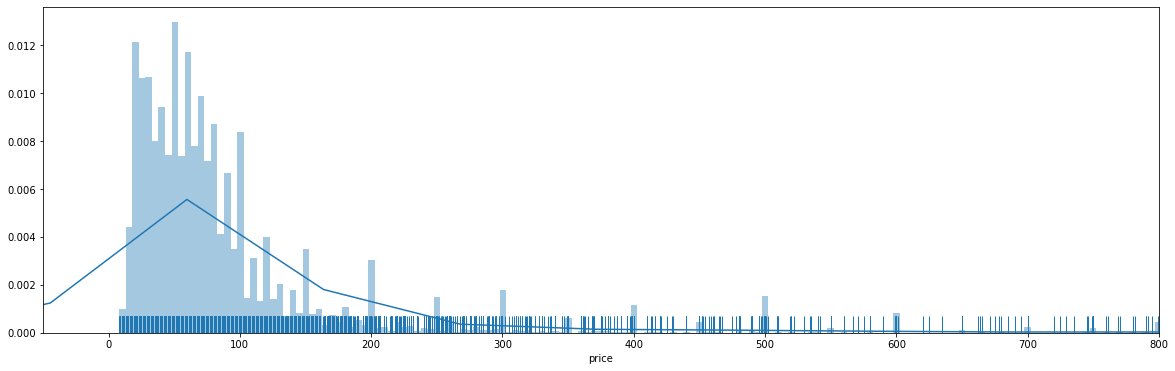

In [10]:
import seaborn as sns
listings_detailed.describe()
plt.figure(figsize=(20,6))
sns.distplot(listings_detailed['price'], rug=True, bins=2000 )
plt.xlim(-50, 800)

In [11]:
listings_detailed['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

In [12]:
listings_detailed['neighbourhood_group_cleansed'].value_counts()

Centro                   9773
Salamanca                1375
Chamberí                 1331
Arganzuela               1121
Tetuán                    838
Carabanchel               678
Retiro                    665
Latina                    616
Ciudad Lineal             613
Puente de Vallecas        591
Chamartín                 551
Moncloa - Aravaca         542
San Blas - Canillejas     524
Usera                     361
Hortaleza                 332
Fuencarral - El Pardo     300
Villaverde                166
Barajas                   165
Moratalaz                 127
Villa de Vallecas         103
Vicálvaro                  65
Name: neighbourhood_group_cleansed, dtype: int64

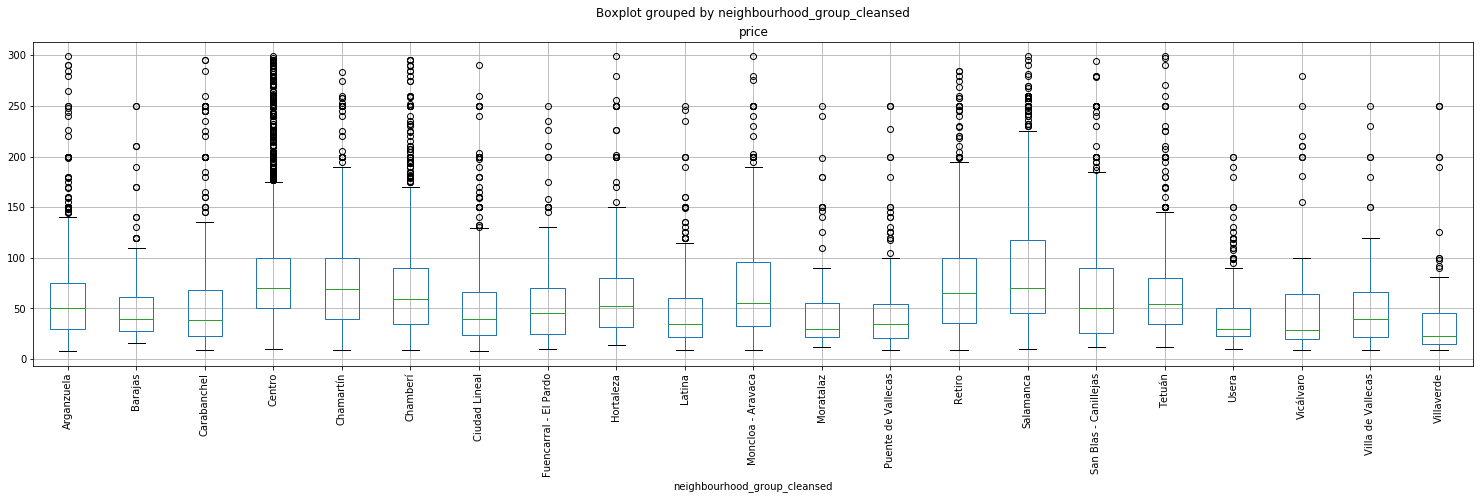

In [13]:
ax1=listings_detailed[listings_detailed['price']<300].boxplot(column='price', by='neighbourhood_group_cleansed', figsize=(25,6), rot=90);
#ax1.set_yscale("log")

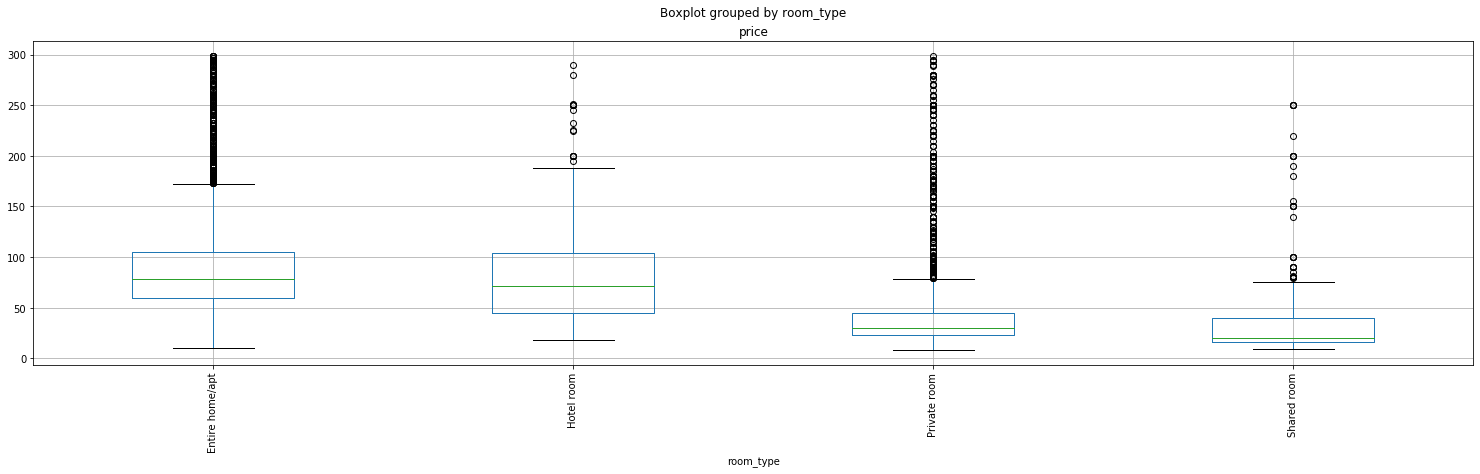

In [14]:
ax=listings_detailed[listings_detailed['price']<300].boxplot(column='price', by='room_type', figsize=(25,6), rot=90)

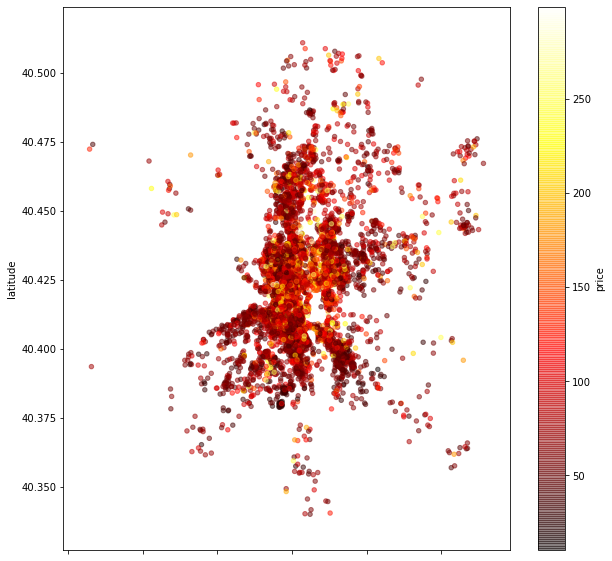

In [15]:
abc=listings_detailed[listings_detailed['price']<300]
abc[abc['room_type']=='Entire home/apt'].plot.scatter(x='longitude', y='latitude', c='price', figsize=(10,10), cmap='hot', alpha=0.5)

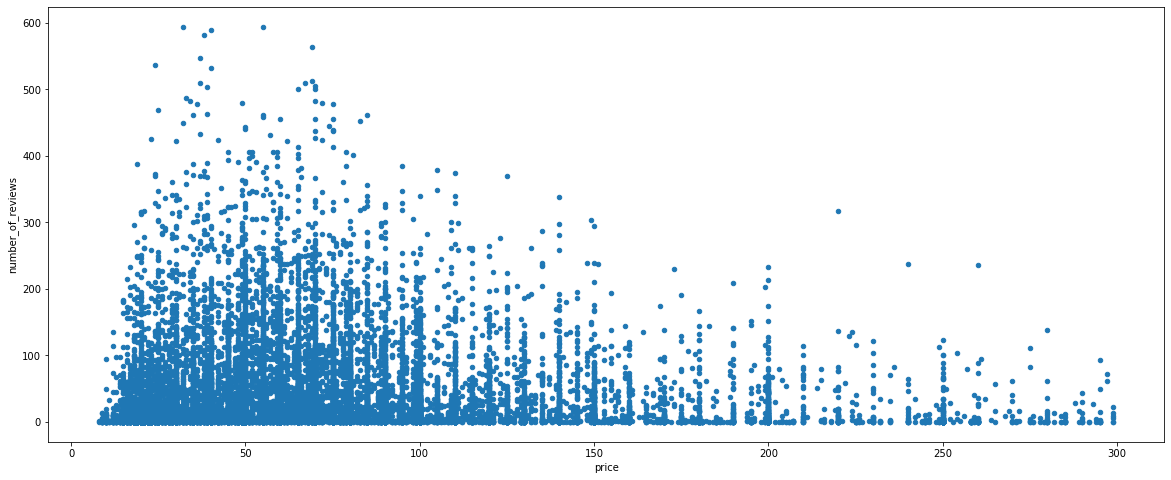

In [16]:
listings_detailed[listings_detailed['price']<300].plot.scatter(y='number_of_reviews', x='price', figsize=(20,8))

In [17]:
listings_detailed['availability_365']

0         53
1         48
2        354
3        301
4        337
        ... 
20832    108
20833     74
20834    196
20835    104
20836    268
Name: availability_365, Length: 20837, dtype: int64

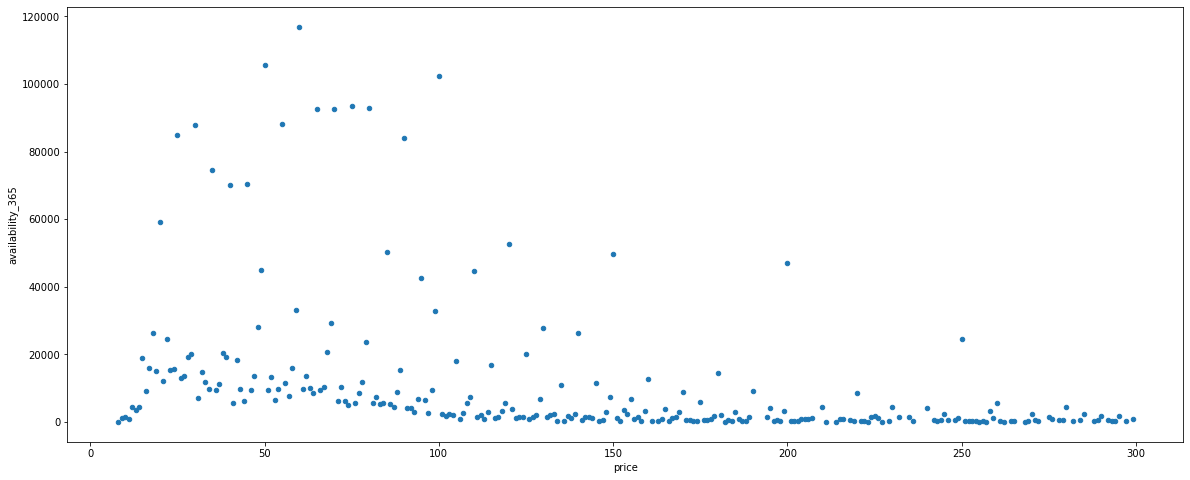

In [18]:
ab=listings_detailed.groupby(['price'])['availability_365'].agg('sum').reset_index()
ab[ab['price']<300].plot.scatter(y='availability_365', x='price', figsize=(20,8))

In [19]:
a124=data[['property_type', 'price']]
xyzabc=a124.groupby('property_type').mean()
xyzabc.loc['Boutique hotel','price']

65.98275862068965

In [20]:
for w in data.property_type.unique():
    data.loc[data['property_type']==w, 'property_type_no'] = xyzabc.loc[w,'price']

In [21]:
a1245=data[['neighbourhood_group_cleansed', 'price']]
xyzabc123=a1245.groupby('neighbourhood_group_cleansed').median()
xyzabc123

,price
neighbourhood_group_cleansed,
Arganzuela,50.0
Barajas,40.0
Carabanchel,38.5
Centro,70.0
Chamartín,69.0
Chamberí,59.0
Ciudad Lineal,40.0
Fuencarral - El Pardo,45.0
Hortaleza,52.0


In [22]:
for w1 in data.neighbourhood_group_cleansed.unique():
    data.loc[data['neighbourhood_group_cleansed']==w1, 'neighbourhood_group_cleansed_no'] = xyzabc123.loc[w1,'price']

In [23]:
data.room_type.unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

In [24]:
a1245=data[['room_type', 'price']]
xyzabc123=a1245.groupby('room_type').median()
for w1 in data.room_type.unique():
    data.loc[data['room_type']==w1, 'room_type_no'] = xyzabc123.loc[w1,'price']
xyzabc123

,price
room_type,
Entire home/apt,78.0
Hotel room,71.0
Private room,30.0
Shared room,20.0


In [25]:
# data.loc[data['room_type']=='Shared room', 'room_type_no'] = 1
# data.loc[data['room_type']=='Private room', 'room_type_no'] = 2
# data.loc[data['room_type']=='Hotel room', 'room_type_no'] = 3
# data.loc[data['room_type']=='Entire home/apt', 'room_type_no'] = 4
data

,host_is_superhost,zipcode,latitude,longitude,property_type,room_type,bathrooms,bedrooms,price,security_deposit,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,neighbourhood_group_cleansed,room_type_no,property_type_no,neighbourhood_group_cleansed_no
0,0,28016,40.45628,-3.67763,Apartment,Private room,1.0,1.0,70.0,0.0,...,10.0,9.0,10.0,9.0,10.0,0,Chamartín,30.0,73.894634,69.0
1,0,28047,40.40341,-3.74084,Apartment,Private room,1.0,1.0,17.0,0.0,...,9.0,10.0,10.0,8.0,9.0,0,Latina,30.0,73.894634,35.0
2,0,28004,40.42202,-3.70395,Apartment,Entire home/apt,1.0,0.0,80.0,200.0,...,8.0,10.0,10.0,10.0,10.0,0,Centro,78.0,73.894634,70.0
3,1,28004,40.41995,-3.69764,Apartment,Entire home/apt,1.5,2.0,115.0,200.0,...,10.0,10.0,10.0,10.0,10.0,0,Centro,78.0,73.894634,70.0
4,0,28045,40.38985,-3.69011,House,Private room,1.0,1.0,25.0,0.0,...,10.0,10.0,10.0,10.0,10.0,0,Arganzuela,30.0,59.102590,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20832,0,28046,40.47847,-3.68395,Apartment,Entire home/apt,1.0,2.0,100.0,500.0,...,0.0,0.0,0.0,0.0,0.0,1,Chamartín,78.0,73.894634,69.0
20833,0,28018,40.38533,-3.63968,Apartment,Private room,1.0,1.0,24.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,Puente de Vallecas,30.0,73.894634,35.0
20834,1,28004,40.42182,-3.70336,Apartment,Entire home/apt,1.0,1.0,75.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,Centro,78.0,73.894634,70.0
20835,0,28012,40.40896,-3.70107,Apartment,Entire home/apt,1.0,0.0,45.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,Centro,78.0,73.894634,70.0


In [26]:
data['host_is_superhost']=data.host_is_superhost.astype('int32')

In [27]:
data.info()
data.fillna(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19305 entries, 0 to 20836
Data columns (total 25 columns):
host_is_superhost                  19305 non-null int32
zipcode                            19305 non-null object
latitude                           19305 non-null float64
longitude                          19305 non-null float64
property_type                      19305 non-null object
room_type                          19305 non-null object
bathrooms                          19305 non-null float64
bedrooms                           19305 non-null float64
price                              19305 non-null float64
security_deposit                   19305 non-null float64
extra_people                       19305 non-null float64
has_availability                   19305 non-null int32
number_of_reviews                  19305 non-null int64
review_scores_rating               19305 non-null float64
review_scores_accuracy             19305 non-null float64
review_scores_cleanliness     

,host_is_superhost,zipcode,latitude,longitude,property_type,room_type,bathrooms,bedrooms,price,security_deposit,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,neighbourhood_group_cleansed,room_type_no,property_type_no,neighbourhood_group_cleansed_no
0,0,28016,40.45628,-3.67763,Apartment,Private room,1.0,1.0,70.0,0.0,...,10.0,9.0,10.0,9.0,10.0,0,Chamartín,30.0,73.894634,69.0
1,0,28047,40.40341,-3.74084,Apartment,Private room,1.0,1.0,17.0,0.0,...,9.0,10.0,10.0,8.0,9.0,0,Latina,30.0,73.894634,35.0
2,0,28004,40.42202,-3.70395,Apartment,Entire home/apt,1.0,0.0,80.0,200.0,...,8.0,10.0,10.0,10.0,10.0,0,Centro,78.0,73.894634,70.0
3,1,28004,40.41995,-3.69764,Apartment,Entire home/apt,1.5,2.0,115.0,200.0,...,10.0,10.0,10.0,10.0,10.0,0,Centro,78.0,73.894634,70.0
4,0,28045,40.38985,-3.69011,House,Private room,1.0,1.0,25.0,0.0,...,10.0,10.0,10.0,10.0,10.0,0,Arganzuela,30.0,59.102590,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20832,0,28046,40.47847,-3.68395,Apartment,Entire home/apt,1.0,2.0,100.0,500.0,...,0.0,0.0,0.0,0.0,0.0,1,Chamartín,78.0,73.894634,69.0
20833,0,28018,40.38533,-3.63968,Apartment,Private room,1.0,1.0,24.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,Puente de Vallecas,30.0,73.894634,35.0
20834,1,28004,40.42182,-3.70336,Apartment,Entire home/apt,1.0,1.0,75.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,Centro,78.0,73.894634,70.0
20835,0,28012,40.40896,-3.70107,Apartment,Entire home/apt,1.0,0.0,45.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,Centro,78.0,73.894634,70.0


In [28]:
data123 = data.copy().drop(['room_type', 'zipcode', 'property_type', 'neighbourhood_group_cleansed'], axis = 1)

In [29]:
from sklearn.preprocessing import Normalizer, StandardScaler, PowerTransformer 
# from sklearn.model_selection import train_test_split
from sklearn import preprocessing
price_loc=data123.columns.get_loc("price")
scaler = Normalizer()
scaler.fit(data123)
X_scaled = scaler.transform(data123)


In [30]:
data123.columns

Index(['host_is_superhost', 'latitude', 'longitude', 'bathrooms', 'bedrooms',
       'price', 'security_deposit', 'extra_people', 'has_availability',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'room_type_no',
       'property_type_no', 'neighbourhood_group_cleansed_no'],
      dtype='object')

In [31]:
df12 = pd.DataFrame(X_scaled)
df12.head(5)
X = df12.copy().drop(price_loc, axis = 1)
Xcolumn=data123.copy().drop("price", axis = 1)
y = df12[price_loc].copy()
X.columns

Int64Index([0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
            20],
           dtype='int64')

In [32]:
X.info()
missing_val_count_by_column = (X.isnull().sum())
print(missing_val_count_by_column)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19305 entries, 0 to 19304
Data columns (total 20 columns):
0     19305 non-null float64
1     19305 non-null float64
2     19305 non-null float64
3     19305 non-null float64
4     19305 non-null float64
6     19305 non-null float64
7     19305 non-null float64
8     19305 non-null float64
9     19305 non-null float64
10    19305 non-null float64
11    19305 non-null float64
12    19305 non-null float64
13    19305 non-null float64
14    19305 non-null float64
15    19305 non-null float64
16    19305 non-null float64
17    19305 non-null float64
18    19305 non-null float64
19    19305 non-null float64
20    19305 non-null float64
dtypes: float64(20)
memory usage: 2.9 MB
0     0
1     0
2     0
3     0
4     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
dtype: int64


In [33]:
# from sklearn.preprocessing import PolynomialFeatures, StandardScaler, PowerTransformer 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.decomposition import PCA
pca = PCA(.95)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [35]:
pca.n_components_

5

In [36]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [37]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
lm.coef_

array([-0.05518772, -0.33184473,  0.22017241, -0.67580402, -0.07073781])

In [39]:
coeff = pca.inverse_transform( lm.coef_)
pd.DataFrame(coeff, Xcolumn.columns,columns=["Coeff"])

,Coeff
host_is_superhost,0.000651
latitude,0.029454
longitude,-0.002714
bathrooms,0.001164
bedrooms,0.007201
security_deposit,0.090299
extra_people,0.920872
has_availability,0.000728
number_of_reviews,-0.006521
review_scores_rating,0.257253


[[1.         0.96313848]
 [0.96313848 1.        ]]


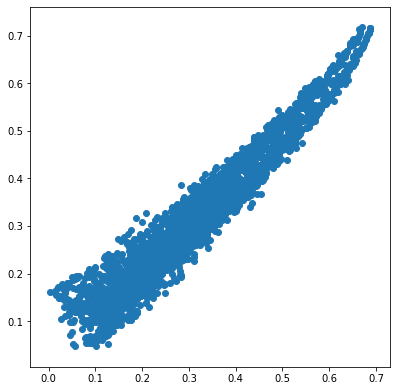

In [40]:
predictions = lm.predict(X_test)
fig = plt.figure(figsize=(5,5))
ax=fig.add_axes([0,0,1,1])
ax.scatter(y_test, predictions)
print(np.corrcoef(y_test, predictions))

[[1.         0.97248087]
 [0.97248087 1.        ]]


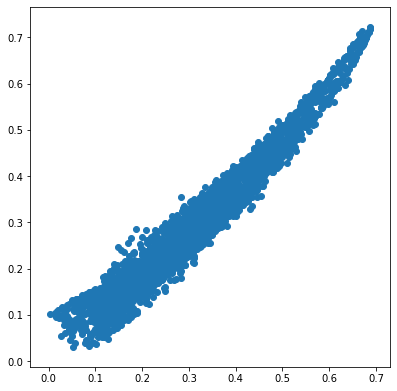

In [41]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge

train_size = y_train.size
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), param_grid={"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2, 5)})
svr.fit(X_train, y_train)
y_svr = svr.predict(X_test)
fig = plt.figure(figsize=(5,5))
ax=fig.add_axes([0,0,1,1])
ax.scatter(y_test, y_svr)
print(np.corrcoef(y_test, y_svr))

[[1.         0.99996585]
 [0.99996585 1.        ]]


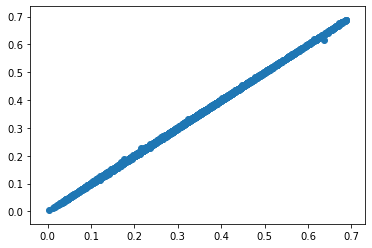

In [42]:
kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3], "gamma": np.logspace(-2, 2, 5)})

kr.fit(X_train, y_train)

y_kr = kr.predict(X_test)

plt.scatter(y_test, y_kr)
print(np.corrcoef(y_test, y_kr))

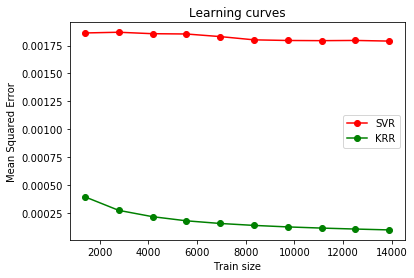

In [43]:
# #############################################################################
# Visualize learning curves
plt.figure()

svr = SVR(kernel='rbf', C=1e1, gamma=0.1)
kr = KernelRidge(kernel='rbf', alpha=0.1, gamma=0.1)
train_sizes, train_scores_svr, test_scores_svr = learning_curve(svr, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), scoring="neg_mean_squared_error", cv=10)
train_sizes_abs, train_scores_kr, test_scores_kr = learning_curve(kr, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), scoring="neg_mean_squared_error", cv=10)

plt.plot(train_sizes, -test_scores_svr.mean(1), 'o-', color="r", label="SVR")
plt.plot(train_sizes, -test_scores_kr.mean(1), 'o-', color="g", label="KRR")
plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title('Learning curves')
plt.legend(loc="best")

plt.show()

In [44]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
alphas = [1000, 100, 50, 20, 10, 1, 0.1, 0.01]
l1_ratios = [0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9]
ridge = RidgeCV(alphas=alphas)
lasso = LassoCV(alphas=alphas, max_iter=10000)
elastic = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios)

LinearRegression mrse_train: 0.03668109457852285, mrse_test: 0.036738601642266146
[[1.         0.96313848]
 [0.96313848 1.        ]]
Ridge mrse_train: 0.03668109472886764, mrse_test: 0.0367385665783977 best alpha: 0.01
[[1.         0.96313849]
 [0.96313849 1.        ]]
Lasso mrse_train: 0.10172402710083149, mrse_test: 0.10112476102879442 best alpha: 0.01
[[1.         0.86527117]
 [0.86527117 1.        ]]
ElasticNet mrse_train: 0.05094515272512919, mrse_test: 0.05074840641977729 best alpha: 0.01 best l1: 0.001
[[1.         0.95623482]
 [0.95623482 1.        ]]


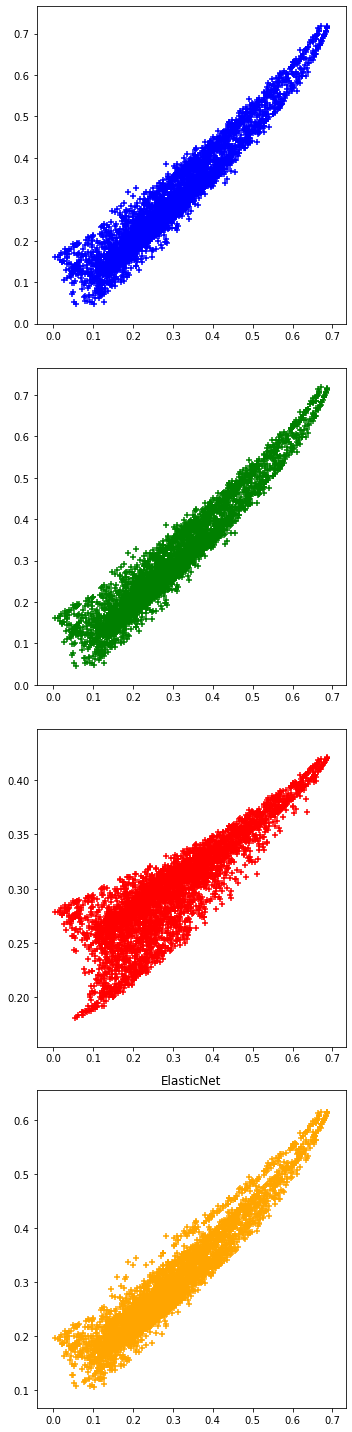

In [45]:
fig, ax = plt.subplots(4, 1, figsize=(5,20))
for i, model, name, color in zip([0,1,2,3], [lr, ridge, lasso, elastic], ['LinearRegression', 'Ridge', 'Lasso', 'ElasticNet'], ['b', 'g', 'r', 'orange']):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    mrse_train = np.sqrt(mean_squared_error(y_pred=y_pred_train, y_true=y_train))
    y_pred = model.predict(X_test)
    mrse_test = np.sqrt(mean_squared_error(y_pred=y_pred, y_true=y_test))

    ax[i].scatter(y_test, y_pred, marker='+', c=color)
    plt.title(name)
    
    best_alpha = ''
    if name != 'LinearRegression':
        best_alpha = ' best alpha: ' + str(model.alpha_)
    best_l1 = ''
    if name == 'ElasticNet':
        best_l1 = ' best l1: '+ str(model.l1_ratio_)
    print(name + ' mrse_train: ' + str(mrse_train) + ', mrse_test: ' + str(mrse_test) + best_alpha + best_l1)
    print(np.corrcoef(y_test, y_pred))

plt.tight_layout()
plt.show()

[[1.         0.96313848]
 [0.96313848 1.        ]]
[[1.         0.96313848]
 [0.96313848 1.        ]]


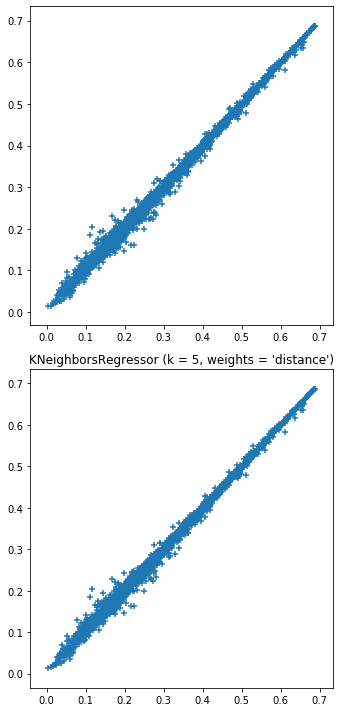

In [46]:
from sklearn import neighbors
 
train_errors = list()
test_errors = list()

fig, ax = plt.subplots(2, 1, figsize=(5,10))

n_neighbors=5
for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_pred = knn.fit(X_train, y_train).predict(X_test)
    
    ax[i].scatter(y_test, y_pred, marker='+')
    plt.title(name)

    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,weights))
    print(np.corrcoef(y_test, predictions))
plt.tight_layout()
plt.show()

**Host**

In [47]:
data_superhost = listings_detailed[listings_detailed['price']<300][['host_response_time','host_response_rate','host_is_superhost','host_listings_count','host_total_listings_count','host_has_profile_pic','host_identity_verified','zipcode','latitude','longitude','is_location_exact','property_type','room_type','bathrooms','bedrooms','square_feet','price','security_deposit','extra_people','minimum_nights_avg_ntm','maximum_nights_avg_ntm','has_availability','availability_365','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','neighbourhood_group_cleansed']]
data_superhost['room_type_no']=data_superhost['price']*0
data_superhost.head()

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,zipcode,latitude,longitude,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,neighbourhood_group_cleansed,room_type_no
0,within a few hours,100.0,False,2.0,2.0,True,False,28016,40.45628,-3.67763,...,98.0,10.0,10.0,9.0,10.0,9.0,10.0,False,Chamartín,0.0
1,NaN,NaN,False,2.0,2.0,True,True,28047,40.40341,-3.74084,...,92.0,9.0,9.0,10.0,10.0,8.0,9.0,False,Latina,0.0
2,within a day,100.0,False,1.0,1.0,True,True,28004,40.42202,-3.70395,...,100.0,8.0,8.0,10.0,10.0,10.0,10.0,False,Centro,0.0
3,within a few hours,100.0,True,1.0,1.0,True,False,28004,40.41995,-3.69764,...,98.0,10.0,10.0,10.0,10.0,10.0,10.0,False,Centro,0.0
4,within an hour,100.0,False,1.0,1.0,True,True,28045,40.38985,-3.69011,...,94.0,10.0,10.0,10.0,10.0,10.0,10.0,False,Arganzuela,0.0


In [48]:
data1=data_superhost.copy()
data1.security_deposit.fillna('$0.00', inplace=True)
data2 = pd.DataFrame(data1.security_deposit)
data1=data2.apply(lambda x: x.replace('$',''))
data1=data1.apply(lambda x: x.replace(',',''))
data_superhost['security_deposit']=data1.astype('float64')

In [49]:
data_superhost.loc[data_superhost['host_response_time']=='a few days or more', 'host_response_time_no'] = 1
data_superhost.loc[data_superhost['host_response_time']=='within a day', 'host_response_time_no'] = 6
data_superhost.loc[data_superhost['host_response_time']=='within a few hours', 'host_response_time_no'] = 24
data_superhost.loc[data_superhost['host_response_time']=='within an hour', 'host_response_time_no'] = 50
data_superhost=data_superhost.fillna(0)
data_superhost=data_superhost.drop('host_response_time', axis=1)
data_superhost.head(5)

,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,zipcode,latitude,longitude,is_location_exact,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,neighbourhood_group_cleansed,room_type_no,host_response_time_no
0,100.0,False,2.0,2.0,True,False,28016,40.45628,-3.67763,True,...,10.0,10.0,9.0,10.0,9.0,10.0,False,Chamartín,0.0,24.0
1,0.0,False,2.0,2.0,True,True,28047,40.40341,-3.74084,False,...,9.0,9.0,10.0,10.0,8.0,9.0,False,Latina,0.0,0.0
2,100.0,False,1.0,1.0,True,True,28004,40.42202,-3.70395,True,...,8.0,8.0,10.0,10.0,10.0,10.0,False,Centro,0.0,6.0
3,100.0,True,1.0,1.0,True,False,28004,40.41995,-3.69764,False,...,10.0,10.0,10.0,10.0,10.0,10.0,False,Centro,0.0,24.0
4,100.0,False,1.0,1.0,True,True,28045,40.38985,-3.69011,True,...,10.0,10.0,10.0,10.0,10.0,10.0,False,Arganzuela,0.0,50.0


In [50]:
data_superhost = data_superhost*1
# data=data.apply(lambda x: x.replace('1',1))
data_superhost['host_is_superhost'].head(5)
# data.head(5)

0    0
1    0
2    0
3    1
4    0
Name: host_is_superhost, dtype: object

In [51]:
data_superhost['host_identity_verified']=data_superhost.host_identity_verified.astype('int32')
data_superhost['host_has_profile_pic']=data_superhost.host_has_profile_pic.astype('int32')
data_superhost['host_is_superhost']=data_superhost.host_is_superhost.astype('int32')

In [52]:
a125=data_superhost[['property_type', 'host_is_superhost']].groupby('property_type')
xyzabd=a125.sum()/(a125.count())
xyzabd.loc['Boutique hotel','host_is_superhost']

0.05172413793103448

In [53]:
for w in data_superhost.property_type.unique():
    data_superhost.loc[data_superhost['property_type']==w, 'property_type_no'] = xyzabd.loc[w,'host_is_superhost']

In [54]:
a125=data_superhost[['room_type', 'host_is_superhost']].groupby('room_type')
xyzabd=a125.sum()/(a125.count())
xyzabd

,host_is_superhost
room_type,
Entire home/apt,0.228090
Hotel room,0.231552
Private room,0.175033
Shared room,0.042636


In [55]:
for w in data_superhost.room_type.unique():
    data_superhost.loc[data_superhost['room_type']==w, 'room_type_no'] = xyzabd.loc[w,'host_is_superhost']

In [56]:
a125=data_superhost[['neighbourhood_group_cleansed', 'host_is_superhost']].groupby('neighbourhood_group_cleansed')
xyzabd=a125.sum()/(a125.count())
xyzabd

,host_is_superhost
neighbourhood_group_cleansed,
Arganzuela,0.228916
Barajas,0.270833
Carabanchel,0.152174
Centro,0.224855
Chamartín,0.213861
Chamberí,0.162602
Ciudad Lineal,0.228417
Fuencarral - El Pardo,0.157088
Hortaleza,0.223776


In [57]:
for w in data_superhost.neighbourhood_group_cleansed.unique():
    data_superhost.loc[data_superhost['neighbourhood_group_cleansed']==w, 'neighbourhood_group_cleansed_no'] = xyzabd.loc[w,'host_is_superhost']

In [58]:
data_superhost.info()
data_superhost.fillna(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19305 entries, 0 to 20836
Data columns (total 36 columns):
host_response_rate                 19305 non-null float64
host_is_superhost                  19305 non-null int32
host_listings_count                19305 non-null float64
host_total_listings_count          19305 non-null float64
host_has_profile_pic               19305 non-null int32
host_identity_verified             19305 non-null int32
zipcode                            19305 non-null object
latitude                           19305 non-null float64
longitude                          19305 non-null float64
is_location_exact                  19305 non-null int32
property_type                      19305 non-null object
room_type                          19305 non-null object
bathrooms                          19305 non-null float64
bedrooms                           19305 non-null float64
square_feet                        19305 non-null float64
price                           

,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,zipcode,latitude,longitude,is_location_exact,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,neighbourhood_group_cleansed,room_type_no,host_response_time_no,property_type_no,neighbourhood_group_cleansed_no
0,100.0,0,2.0,2.0,1,0,28016,40.45628,-3.67763,1,...,9.0,10.0,9.0,10.0,0,Chamartín,0.175033,24.0,0.211299,0.213861
1,0.0,0,2.0,2.0,1,1,28047,40.40341,-3.74084,0,...,10.0,10.0,8.0,9.0,0,Latina,0.175033,0.0,0.211299,0.175221
2,100.0,0,1.0,1.0,1,1,28004,40.42202,-3.70395,1,...,10.0,10.0,10.0,10.0,0,Centro,0.228090,6.0,0.211299,0.224855
3,100.0,1,1.0,1.0,1,0,28004,40.41995,-3.69764,0,...,10.0,10.0,10.0,10.0,0,Centro,0.228090,24.0,0.211299,0.224855
4,100.0,0,1.0,1.0,1,1,28045,40.38985,-3.69011,1,...,10.0,10.0,10.0,10.0,0,Arganzuela,0.175033,50.0,0.113546,0.228916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20832,100.0,0,4.0,4.0,1,0,28046,40.47847,-3.68395,0,...,0.0,0.0,0.0,0.0,1,Chamartín,0.228090,50.0,0.211299,0.213861
20833,100.0,0,4.0,4.0,1,0,28018,40.38533,-3.63968,1,...,0.0,0.0,0.0,0.0,1,Puente de Vallecas,0.175033,50.0,0.211299,0.182624
20834,100.0,1,2.0,2.0,1,0,28004,40.42182,-3.70336,1,...,0.0,0.0,0.0,0.0,1,Centro,0.228090,50.0,0.211299,0.224855
20835,0.0,0,1.0,1.0,1,1,28012,40.40896,-3.70107,1,...,0.0,0.0,0.0,0.0,0,Centro,0.228090,0.0,0.211299,0.224855


In [59]:
data123 = data_superhost.copy().drop(['room_type', 'zipcode', 'property_type', 'neighbourhood_group_cleansed'], axis = 1)

In [60]:
print(data123.columns.get_loc("host_is_superhost"))

1


In [61]:
X_superhost_1 = data123.copy().drop('host_is_superhost', axis = 1)
y_superhost = data123['host_is_superhost'].copy()
scaler = Normalizer()
scaler.fit(X_superhost_1)
X_superhost = scaler.transform(data123)

In [62]:
# df12 = pd.DataFrame data123['(X_superhost_scaled)
# X_superhost = df12.copy().drop(1, axis = 1)
# y_superhost = df12[1].copy()
# X_superhost.columns

In [63]:
X_superhost_train, X_superhost_test, y_superhost_train, y_superhost_test = train_test_split(X_superhost, y_superhost, test_size=0.2, random_state=100)

In [64]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
lm.fit(X_superhost_train, y_superhost_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

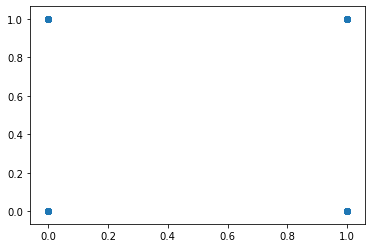

In [65]:
predictions = lm.predict(X_superhost_test)
plt.scatter(y_superhost_test, predictions)

In [66]:
from sklearn.metrics import classification_report
print(np.corrcoef(y_superhost_test, predictions))
print (classification_report(y_superhost_test, predictions))

[[1.         0.15432176]
 [0.15432176 1.        ]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      3053
           1       0.50      0.11      0.18       808

    accuracy                           0.79      3861
   macro avg       0.65      0.54      0.53      3861
weighted avg       0.74      0.79      0.73      3861



[4.63439954e-02 4.05418538e-01 7.88416196e-03 1.01428248e-02
 8.33018248e-04 1.17911161e-03 4.80004855e-03 2.09627680e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.33601160e-04 0.00000000e+00 1.39325296e-03
 5.21680315e-03 2.21519283e-03 5.96575499e-03 8.00324087e-02
 1.02874541e-01 5.72984916e-02 8.35226334e-02 2.50274514e-02
 7.80794683e-02 1.98716983e-02 3.80548525e-02 0.00000000e+00
 1.71176396e-03 1.80645353e-02 0.00000000e+00 1.73957576e-03]
[[1.         0.86078128]
 [0.86078128 1.        ]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3053
           1       1.00      0.78      0.88       808

    accuracy                           0.95      3861
   macro avg       0.97      0.89      0.93      3861
weighted avg       0.96      0.95      0.95      3861



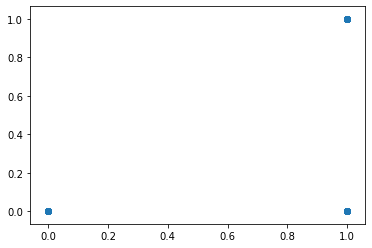

In [67]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_superhost_train, y_superhost_train)

print(clf.feature_importances_)

y_pred=clf.predict(X_superhost_test)

plt.scatter(y_superhost_test, y_pred)
# plt.xlim(-20, 300)
print(np.corrcoef(y_superhost_test, y_pred))
print (classification_report(y_superhost_test, y_pred))

[[1.         0.33233967]
 [0.33233967 1.        ]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      3053
           1       0.49      0.45      0.47       808

    accuracy                           0.79      3861
   macro avg       0.67      0.66      0.67      3861
weighted avg       0.78      0.79      0.78      3861



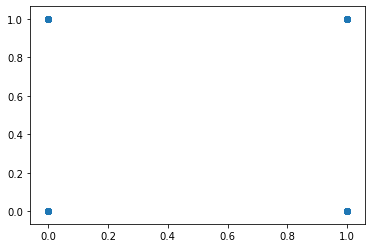

In [68]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_superhost_train, y_superhost_train)
y_pred=neigh.predict(X_superhost_test)
plt.scatter(y_superhost_test, y_pred)
# plt.xlim(-20, 300)
print(np.corrcoef(y_superhost_test, y_pred))
print (classification_report(y_superhost_test, y_pred))

In [69]:
X_train1=(X_superhost_train)
X_test1=(X_superhost_test)
y_train1=y_superhost_train.to_numpy()
y_test1=y_superhost_test.to_numpy()


print(type(X_train1))
print(type(X_test1))
print(type(y_train1))
print(type(y_test1))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [70]:
import tensorflow as tf
from tensorflow.keras import regularizers

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='tanh', input_shape=(X_train1.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='tanh', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='tanh', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='tanh', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
y_pred=model.predict(X_test1)
num_epochs = 100

history = model.fit(X_train1, y_train1, epochs=num_epochs, batch_size=256, validation_data=(X_test1, y_test1))
model.summary()

Train on 15444 samples, validate on 3861 samples
Epoch 1/100
15444/15444 [==============================] - 1s 69us/sample - loss: 0.8268 - accuracy: 0.7861 - val_loss: 0.7477 - val_accuracy: 0.7912
Epoch 2/100
15444/15444 [==============================] - 0s 11us/sample - loss: 0.7012 - accuracy: 0.7925 - val_loss: 0.6500 - val_accuracy: 0.7861
Epoch 3/100
15444/15444 [==============================] - 0s 11us/sample - loss: 0.6224 - accuracy: 0.7922 - val_loss: 0.5894 - val_accuracy: 0.7845
Epoch 4/100
15444/15444 [==============================] - 0s 12us/sample - loss: 0.5723 - accuracy: 0.7925 - val_loss: 0.5499 - val_accuracy: 0.7853
Epoch 5/100
15444/15444 [==============================] - 0s 11us/sample - loss: 0.5357 - accuracy: 0.7905 - val_loss: 0.5209 - val_accuracy: 0.7897
Epoch 6/100
15444/15444 [==============================] - 0s 11us/sample - loss: 0.5124 - accuracy: 0.7927 - val_loss: 0.5028 - val_accuracy: 0.7884
Epoch 7/100
15444/15444 [==========================

In [71]:
abc12 = []
for x12 in y_test1:
    if x12==1:
        abc12.append([1])
    else:
        abc12.append([0])
y_test1=abc12

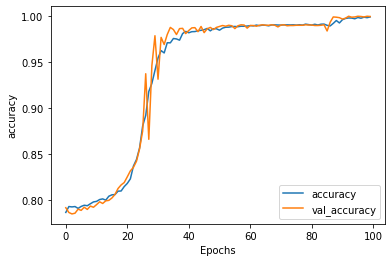

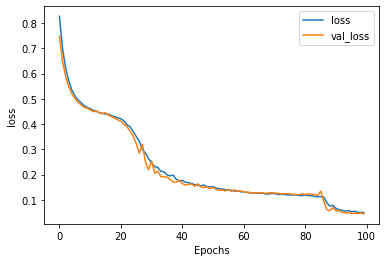

In [72]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [73]:
predic = []
for xx in model.predict(X_test1):
    if xx>0.5:
        predic.append([1])
    else:
        predic.append([0])
print (classification_report(y_test1, predic))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3053
           1       1.00      1.00      1.00       808

    accuracy                           1.00      3861
   macro avg       1.00      1.00      1.00      3861
weighted avg       1.00      1.00      1.00      3861



In [1]:
# from sklearn.ensemble import RandomForestClassifier

# clf = RandomForestClassifier(max_depth=2, random_state=0)
# clf.fit(X_train, y_train)

# print(clf.feature_importances_)

# y_pred=clf.predict(X_test)

# plt.scatter(y_test, y_pred)
# # plt.xlim(-20, 300)
# print(np.corrcoef(y_test, y_pred))